In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
PG_USER = "your_user_name"
PG_PASS = "your_pwd"
PG_HOST = "localhost" 
PG_PORT = "5432"
PG_DB   = "real_estate_moscow"

In [5]:
engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{PG_PASS}@{PG_HOST}:{PG_PORT}/{PG_DB}"
)

Топ-3 районов по средней цене жилой недвижимости

In [22]:
query_top_residential = """
SELECT
    d.district_name,
    ROUND(AVG(f.price), 0) AS avg_price
FROM fact_real_estate f
JOIN dim_property_types p
    ON f.property_type_id = p.property_type_id
JOIN dim_districts d
    ON f.district_id = d.district_id
WHERE p.property_category = 'жилая'
GROUP BY d.district_name
ORDER BY avg_price DESC
LIMIT 3;
"""

df_top_residential = pd.read_sql(query_top_residential, engine)

print("ТОП-3 районов по средней цене жилой недвижимости")
display(df_top_residential)


ТОП-3 районов по средней цене жилой недвижимости


,district_name,avg_price
0,ЦАО,30444766.0
1,ЗАО,22535787.0
2,СЗАО,19601726.0


Топ-3 районов по средней цене коммерческой недвижимости

In [23]:
query_top_commercial = """
SELECT
    d.district_name,
    ROUND(AVG(f.price), 0) AS avg_price
FROM fact_real_estate f
JOIN dim_property_types p
    ON f.property_type_id = p.property_type_id
JOIN dim_districts d
    ON f.district_id = d.district_id
WHERE p.property_category = 'коммерческая'
GROUP BY d.district_name
ORDER BY avg_price DESC
LIMIT 3;
"""

df_top_commercial = pd.read_sql(query_top_commercial, engine)

print("ТОП-3 районов по средней цене коммерческой недвижимости")
display(df_top_commercial)


ТОП-3 районов по средней цене коммерческой недвижимости


,district_name,avg_price
0,ЦАО,46403195.0
1,ЗАО,36177516.0
2,СЗАО,30588837.0


Структура рынка недвижимости по категориям

In [24]:
query_market_structure = """
SELECT
    p.property_category,
    COUNT(*) AS object_count,
    ROUND(
        COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (),
        2
    ) AS share_percent
FROM fact_real_estate f
JOIN dim_property_types p
    ON f.property_type_id = p.property_type_id
GROUP BY p.property_category
ORDER BY object_count DESC;
"""

df_market_structure = pd.read_sql(query_market_structure, engine)

print("Структура рынка недвижимости по категориям")
display(df_market_structure)


Структура рынка недвижимости по категориям


,property_category,object_count,share_percent
0,жилая,2004,70.34
1,коммерческая,600,21.06
2,прочая,146,5.12
3,земля,99,3.47


Средняя стоимость квадратного метра жилья по районам

In [6]:
query_price_per_sqm = """
SELECT
    d.district_name,
    ROUND(AVG(f.price_per_sqm), 0) AS avg_price_per_sqm
FROM fact_real_estate f
JOIN dim_property_types p
    ON f.property_type_id = p.property_type_id
JOIN dim_districts d
    ON f.district_id = d.district_id
WHERE p.property_category = 'жилая'
    AND f.price_per_sqm > 0
GROUP BY d.district_name
ORDER BY avg_price_per_sqm DESC;
"""

df_price_sqm = pd.read_sql(query_price_per_sqm, engine)

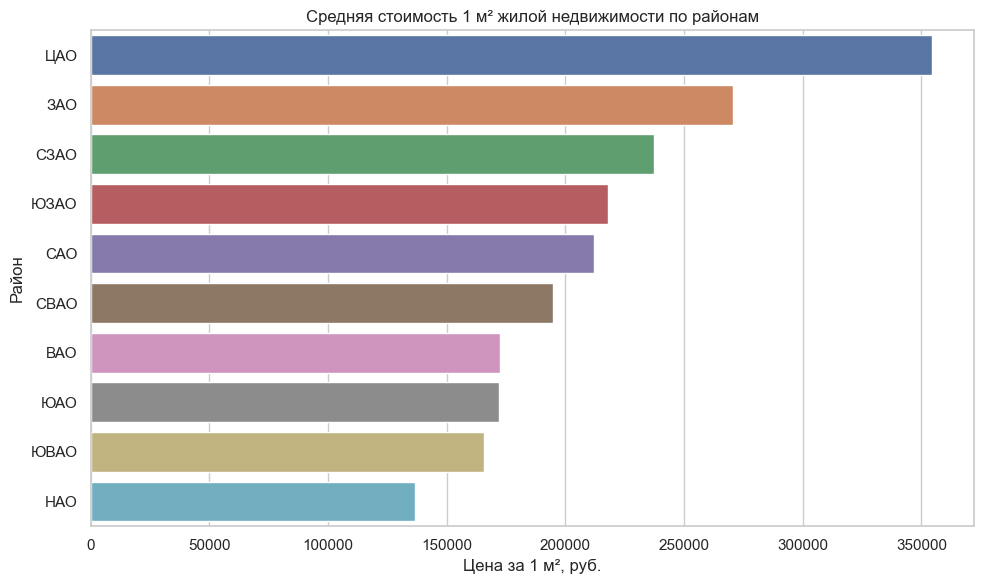

In [7]:
plt.figure()
sns.barplot(
    data=df_price_sqm,
    x="avg_price_per_sqm",
    y="district_name"
)
plt.title("Средняя стоимость 1 м² жилой недвижимости по районам")
plt.xlabel("Цена за 1 м², руб.")
plt.ylabel("Район")
plt.tight_layout()
plt.show()

Распределение типов недвижимости по районам

In [10]:
query_structure = """
SELECT
    d.district_name,
    p.property_type_name,
    COUNT(*) AS object_count
FROM fact_real_estate f
JOIN dim_property_types p
    ON f.property_type_id = p.property_type_id
JOIN dim_districts d
    ON f.district_id = d.district_id
GROUP BY d.district_name, p.property_type_name
ORDER BY d.district_name, object_count DESC;
"""

df_structure = pd.read_sql(query_structure, engine)

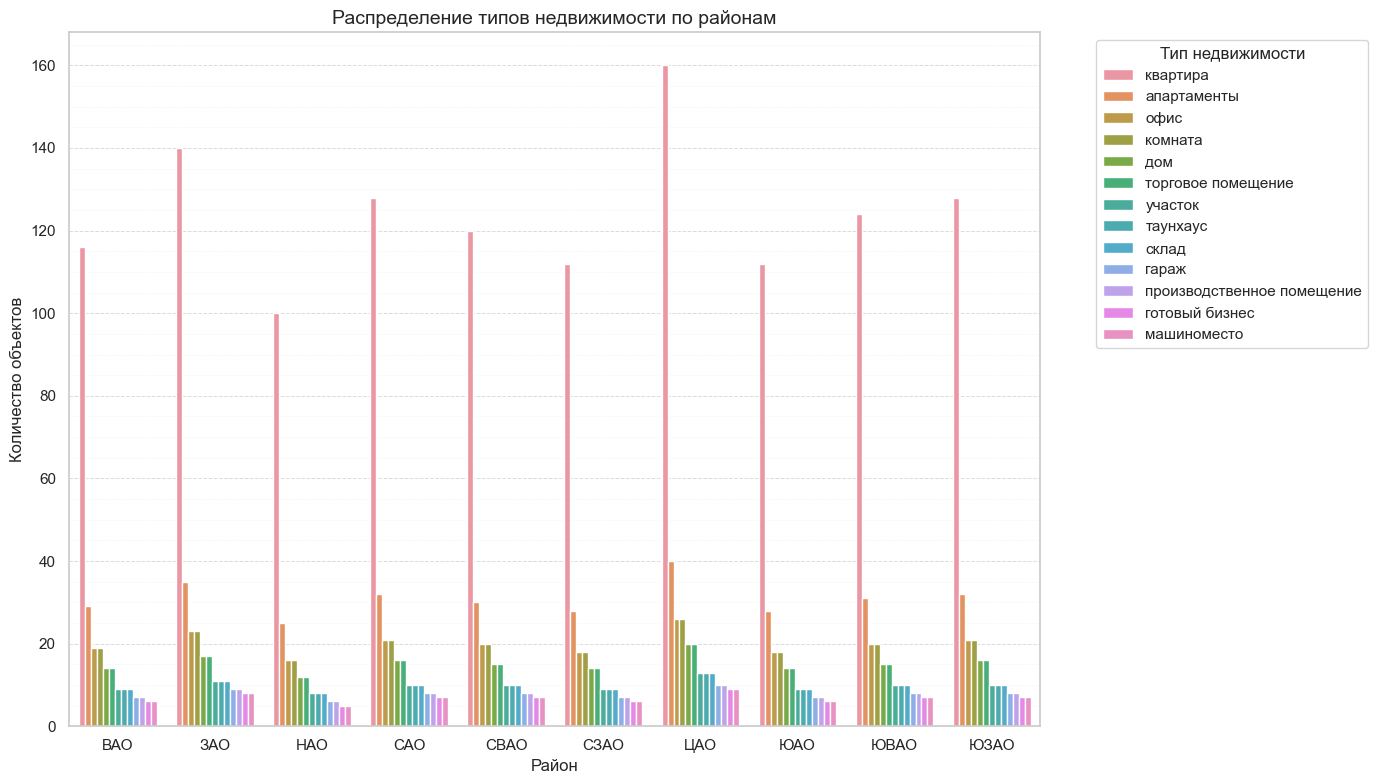

In [21]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=df_structure,
    x="district_name",
    y="object_count",
    hue="property_type_name"
)

plt.title("Распределение типов недвижимости по районам", fontsize=14)
plt.xlabel("Район", fontsize=12)
plt.ylabel("Количество объектов", fontsize=12)

plt.grid(which="major", axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.minorticks_on()
plt.grid(which="minor", axis="y", linestyle=":", linewidth=0.4, alpha=0.4)

plt.legend(
    title="Тип недвижимости",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()
